# <font color=black>**Importing libraries**</font>

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

# <font color=black>**Loading data**</font>

In [3]:
df=pd.read_csv('diabetes.csv')

# <font color=black>**Data overview**</font>

In [6]:
#First 5 lines of the DataFrame

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
# Last 5 lines of the dataset

df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [8]:
#General information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#descriptive statistics of a DataFrame.

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# <font color=black>**Exploratory data analysis**</font>

### <font color=black>**Step 1: Missing value analysis**</font>

In [14]:
#These values are usually used to represent empty fields in a dataset
#From the above Non-Null Count we can see there is no missing values.
#However it is good to check for missing values once again
#If we would have missing values
#We would either delete the entire row which contain NaN values or use mean(normal)/median(skewed)/mode(categorical).

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### <font color=black>**Step 2: Univariate Analysis (Distribution)**</font>

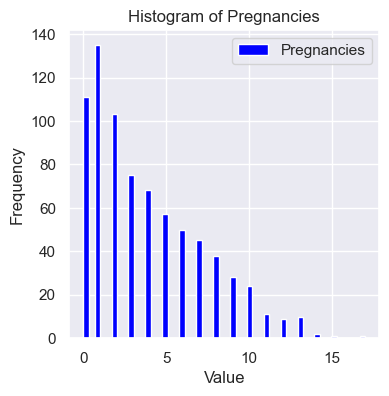

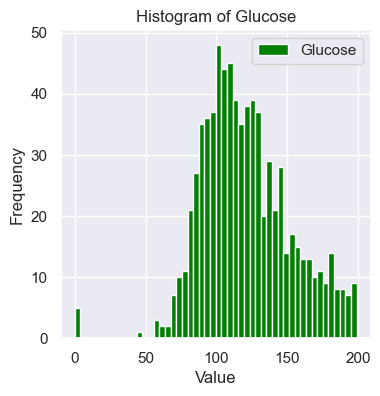

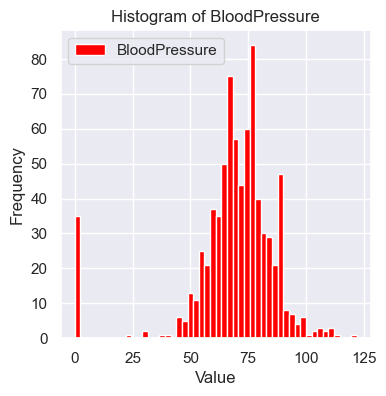

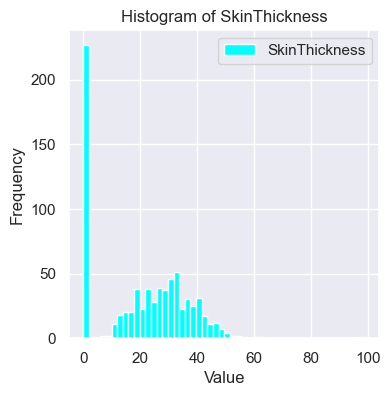

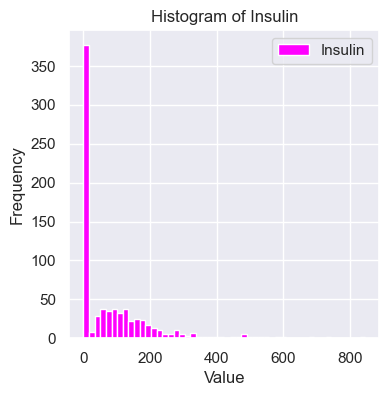

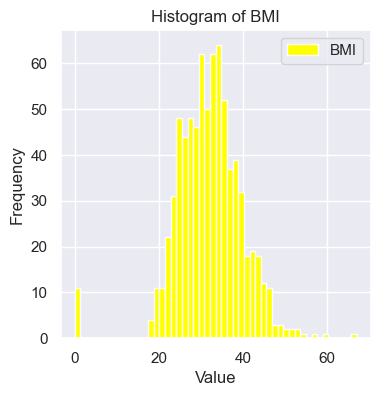

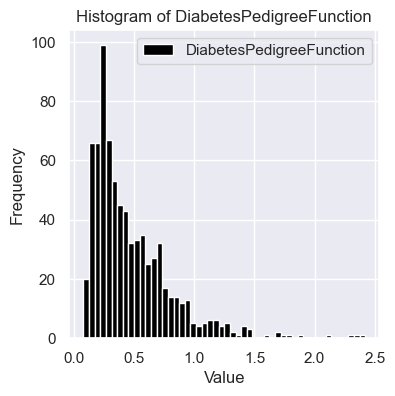

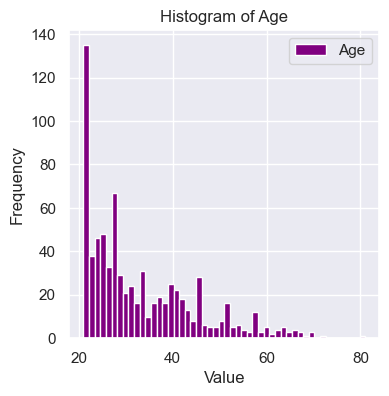

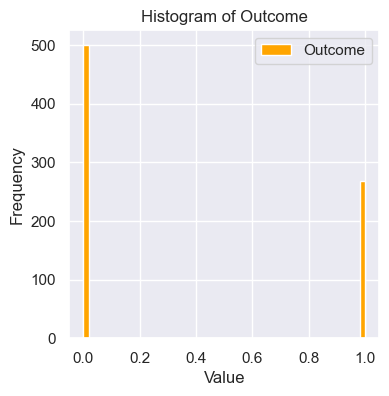

In [25]:
#Univariate Analysis involves examining the distribution and summary statistics of a single variable. 
#Examples include histograms, box plots, and frequency tables.


colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple','orange']

# Plot histograms for each feature
for i, col in enumerate(df.columns):
    plt.figure(figsize=(4,4))
    plt.hist(df[col], bins=50, color=colors[i])
    plt.title("Histogram of " + col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend([col])
    plt.show()

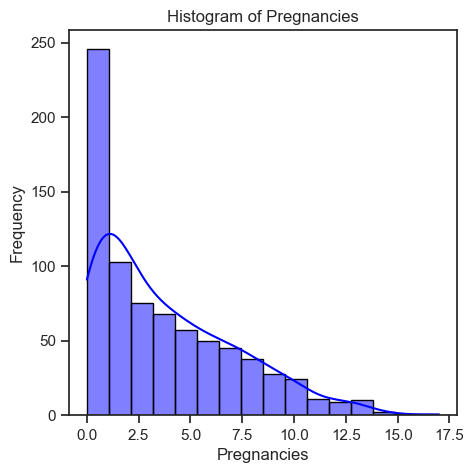

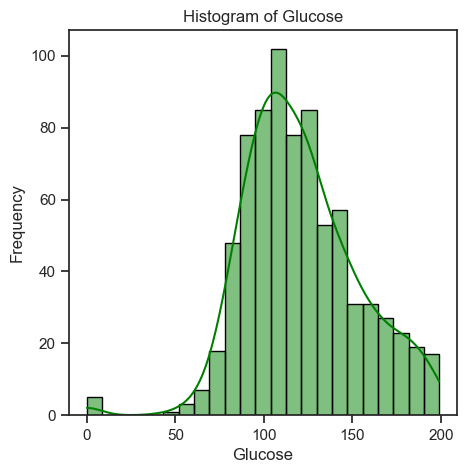

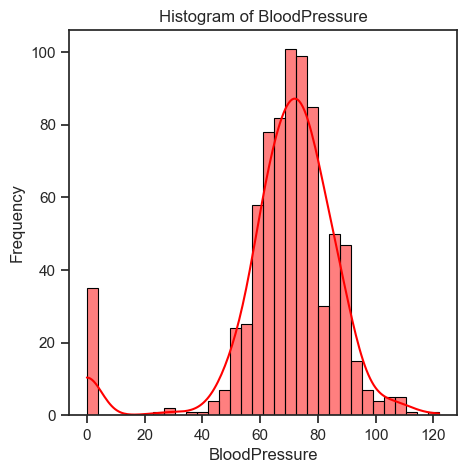

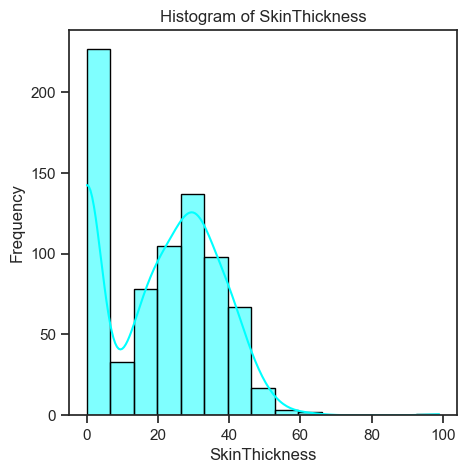

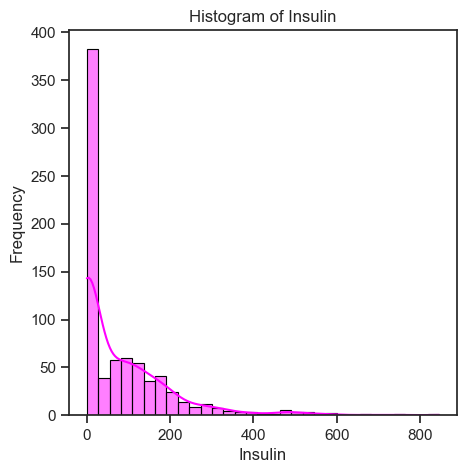

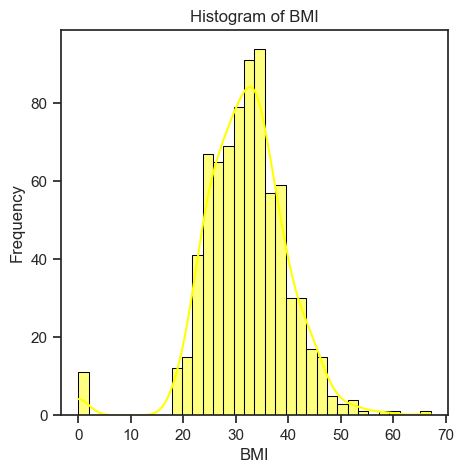

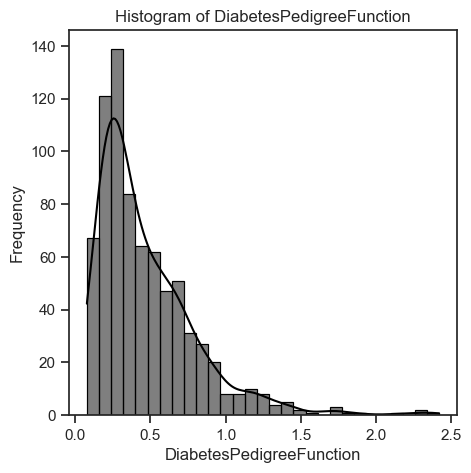

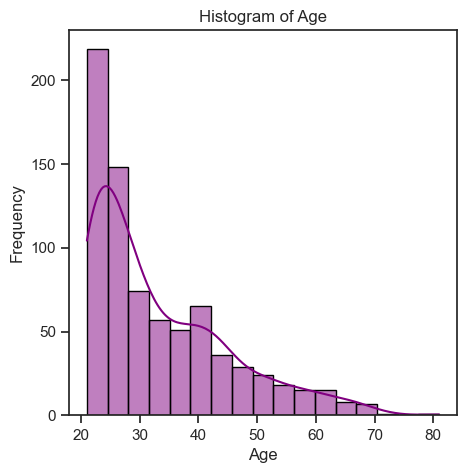

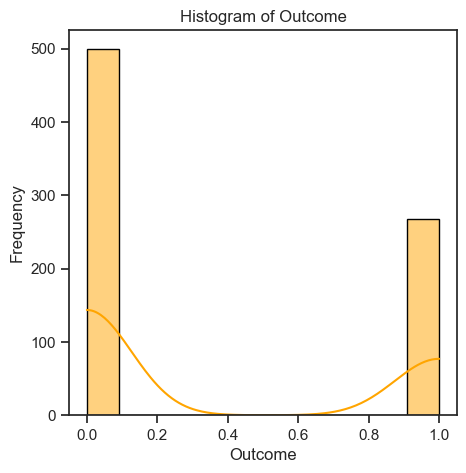

In [20]:
#Let's now use seaborn for better visuals

sns.set(style="ticks")
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple','orange']


# Create histograms for each column
for i,col in enumerate(df.columns):
    plt.figure(figsize=(5,5))
    sns.histplot(data=df, x=col, kde=True, color=colors[i], edgecolor='black')
    plt.title("Histogram of " + col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

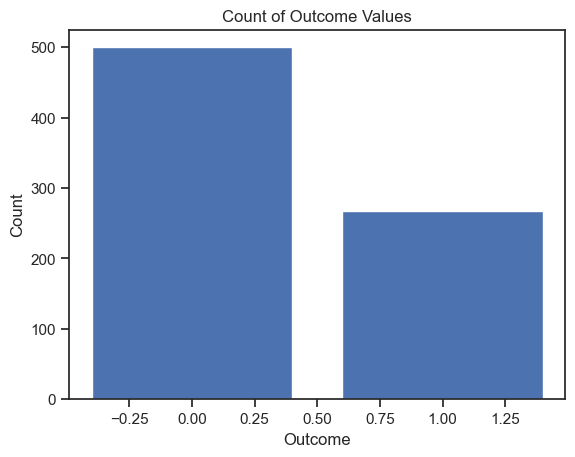

In [22]:
# Now we need to check the distribution of our target variable specially
# The target variable tells us how well-balanced dataset is
# As it is a categorical variable we are gonna use barplot
#Let's first use matplotlib

outcome_counts = df['Outcome'].value_counts()

plt.bar(outcome_counts.index,outcome_counts.values)
plt.title("Count of Outcome Values")
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#As we can see the dataset is not well-balanced
#Ideally,the dataset should contain all the categories in the target column equally 
#which is a perfectly balanced dataset

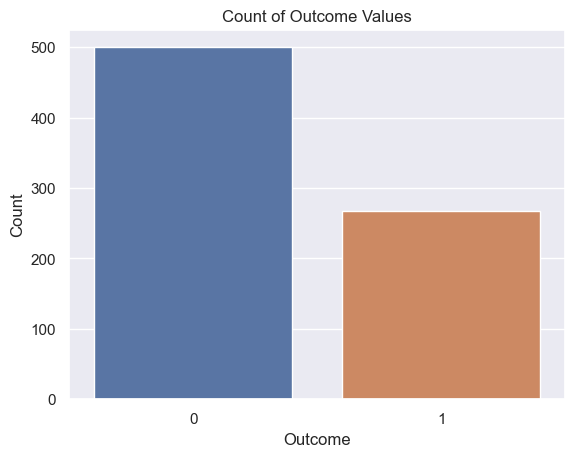

In [24]:
#Let's make that bar plot look better by using seaborn(sns)
sns.set(style='darkgrid')

sns.countplot(x="Outcome",data=df)
plt.title('Count of Outcome Values')
plt.xlabel("Outcome")
plt.ylabel("Count")

plt.show()

### <font color=black>**Step 3: Bivariate Analysis**</font>

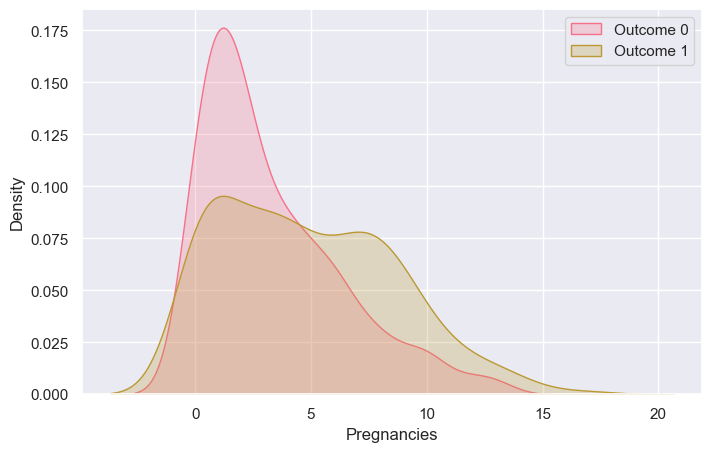

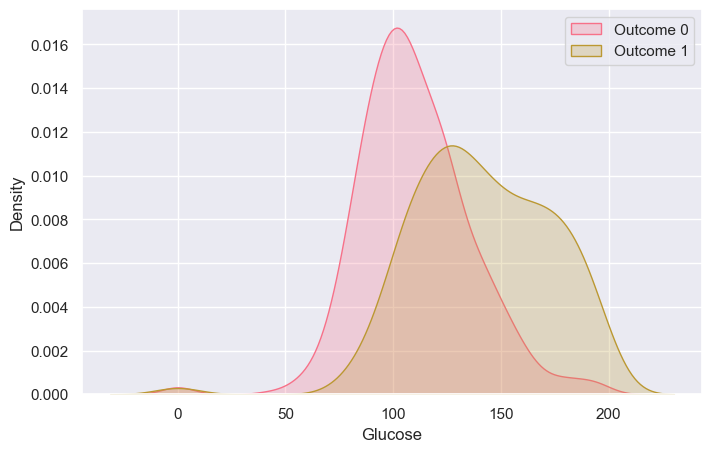

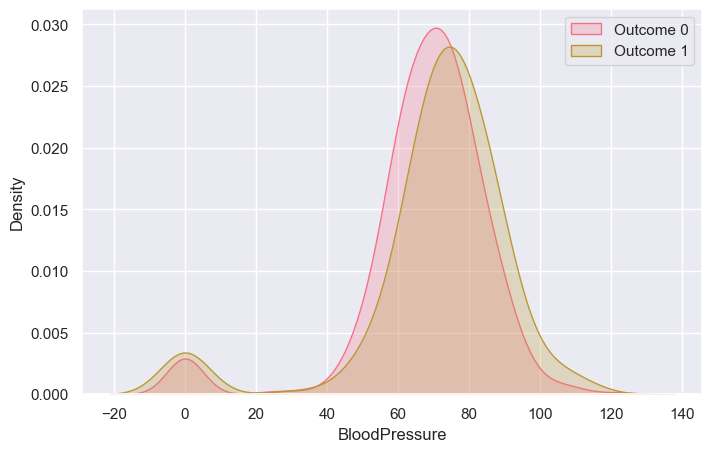

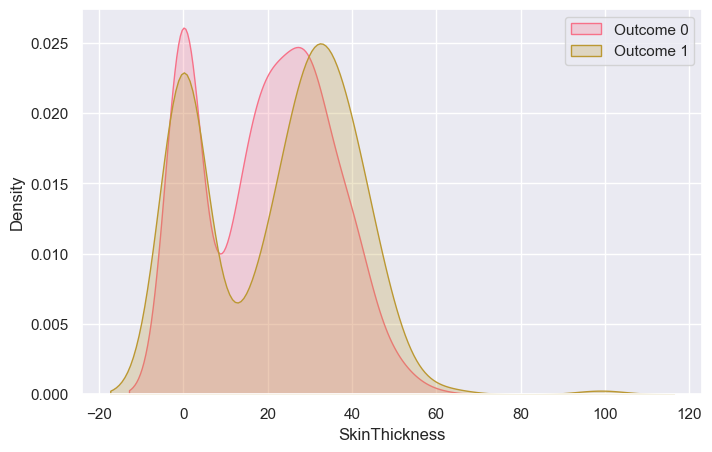

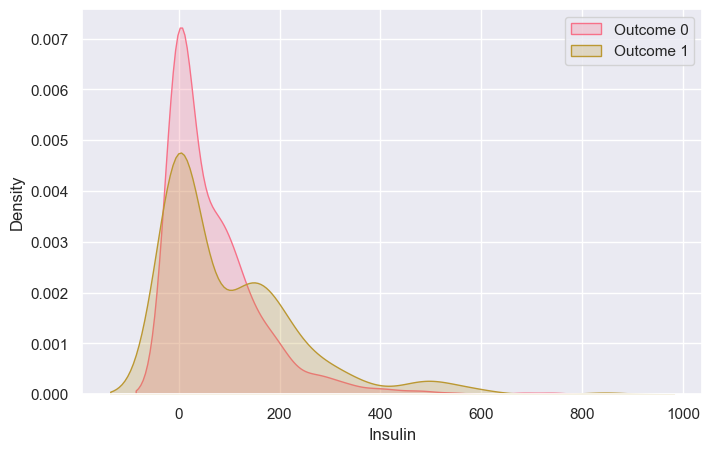

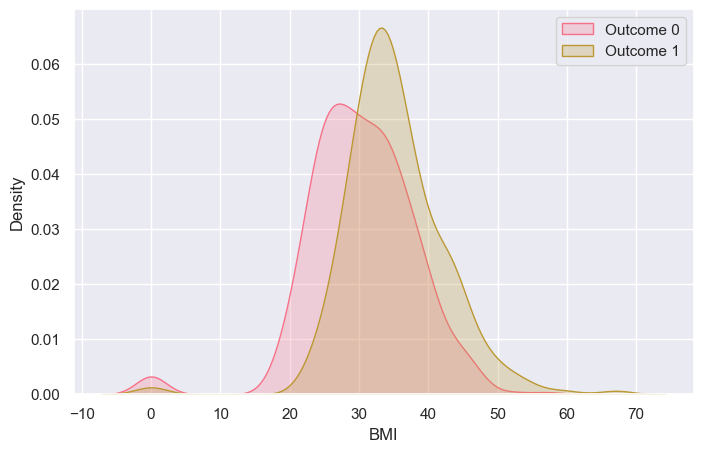

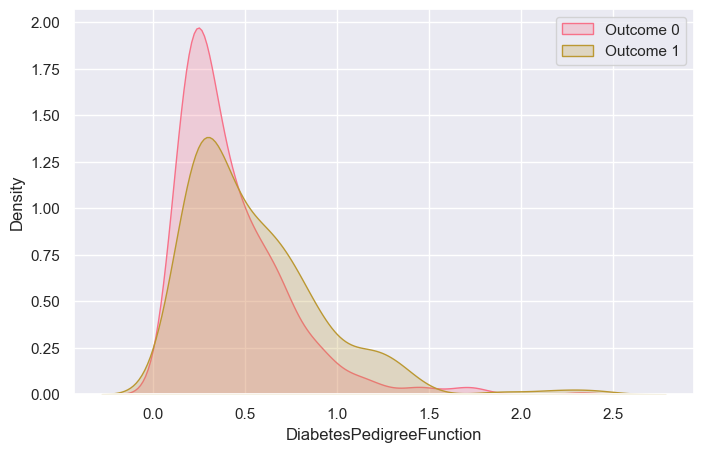

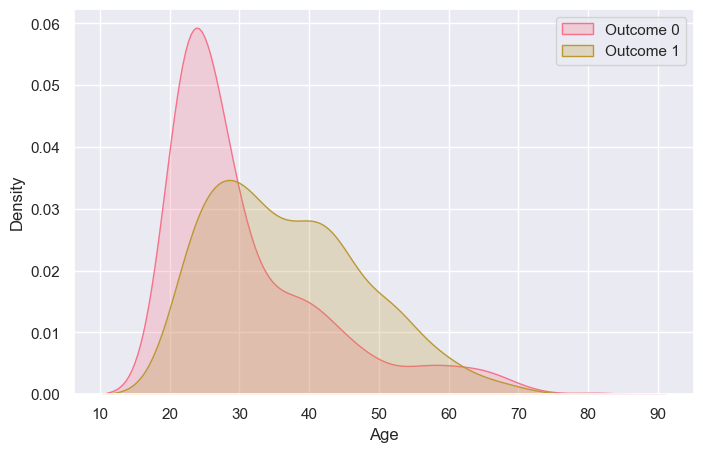

In [34]:
# Bivariate Analysis involves exploring the relationship between two variables. 
# Scatter plots, line plots, and correlation coefficients are common tools used in bivariate analysis.
# Now we can check the distribution of values based on each outcomes

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
sns.set_palette("husl")

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df.loc[df['Outcome'] == 0, col], shade=True, label="Outcome 0")
    sns.kdeplot(df.loc[df['Outcome'] == 1, col], shade=True, label="Outcome 1")
    plt.xlabel(col)
    plt.legend()
    plt.show()

### <font color=black>**Step 4: Multivariate Analysis**</font>

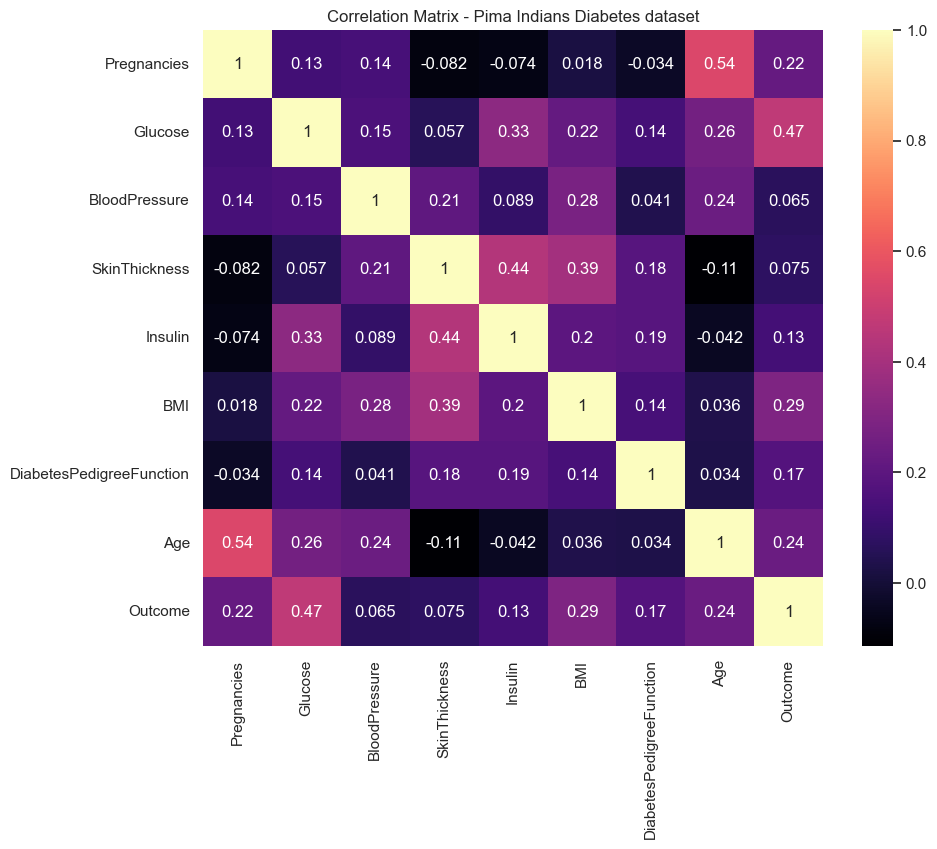

In [46]:
# Multivariate Analysis involves examining the relationship between three or more variables. 
# Heat maps and parallel coordinate plots are examples of multivariate visualization tools

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix,annot=True,cmap='magma')
plt.title('Correlation Matrix - Pima Indians Diabetes dataset')
plt.show()

In [47]:
#Parallel Coordinates is also used to spot outliers in the dataset
#These lines shows the general trends within the dataset 
#And the few lines which doesnt follow the pattern, indicates the presence of outliers. 
#For machine learning, outliers can be problematic when it comes to model training.

plt.figure(figsize=(10, 8))
fig = px.parallel_coordinates(df,color='Outcome',dimensions = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
fig.show()

<Figure size 1000x800 with 0 Axes>

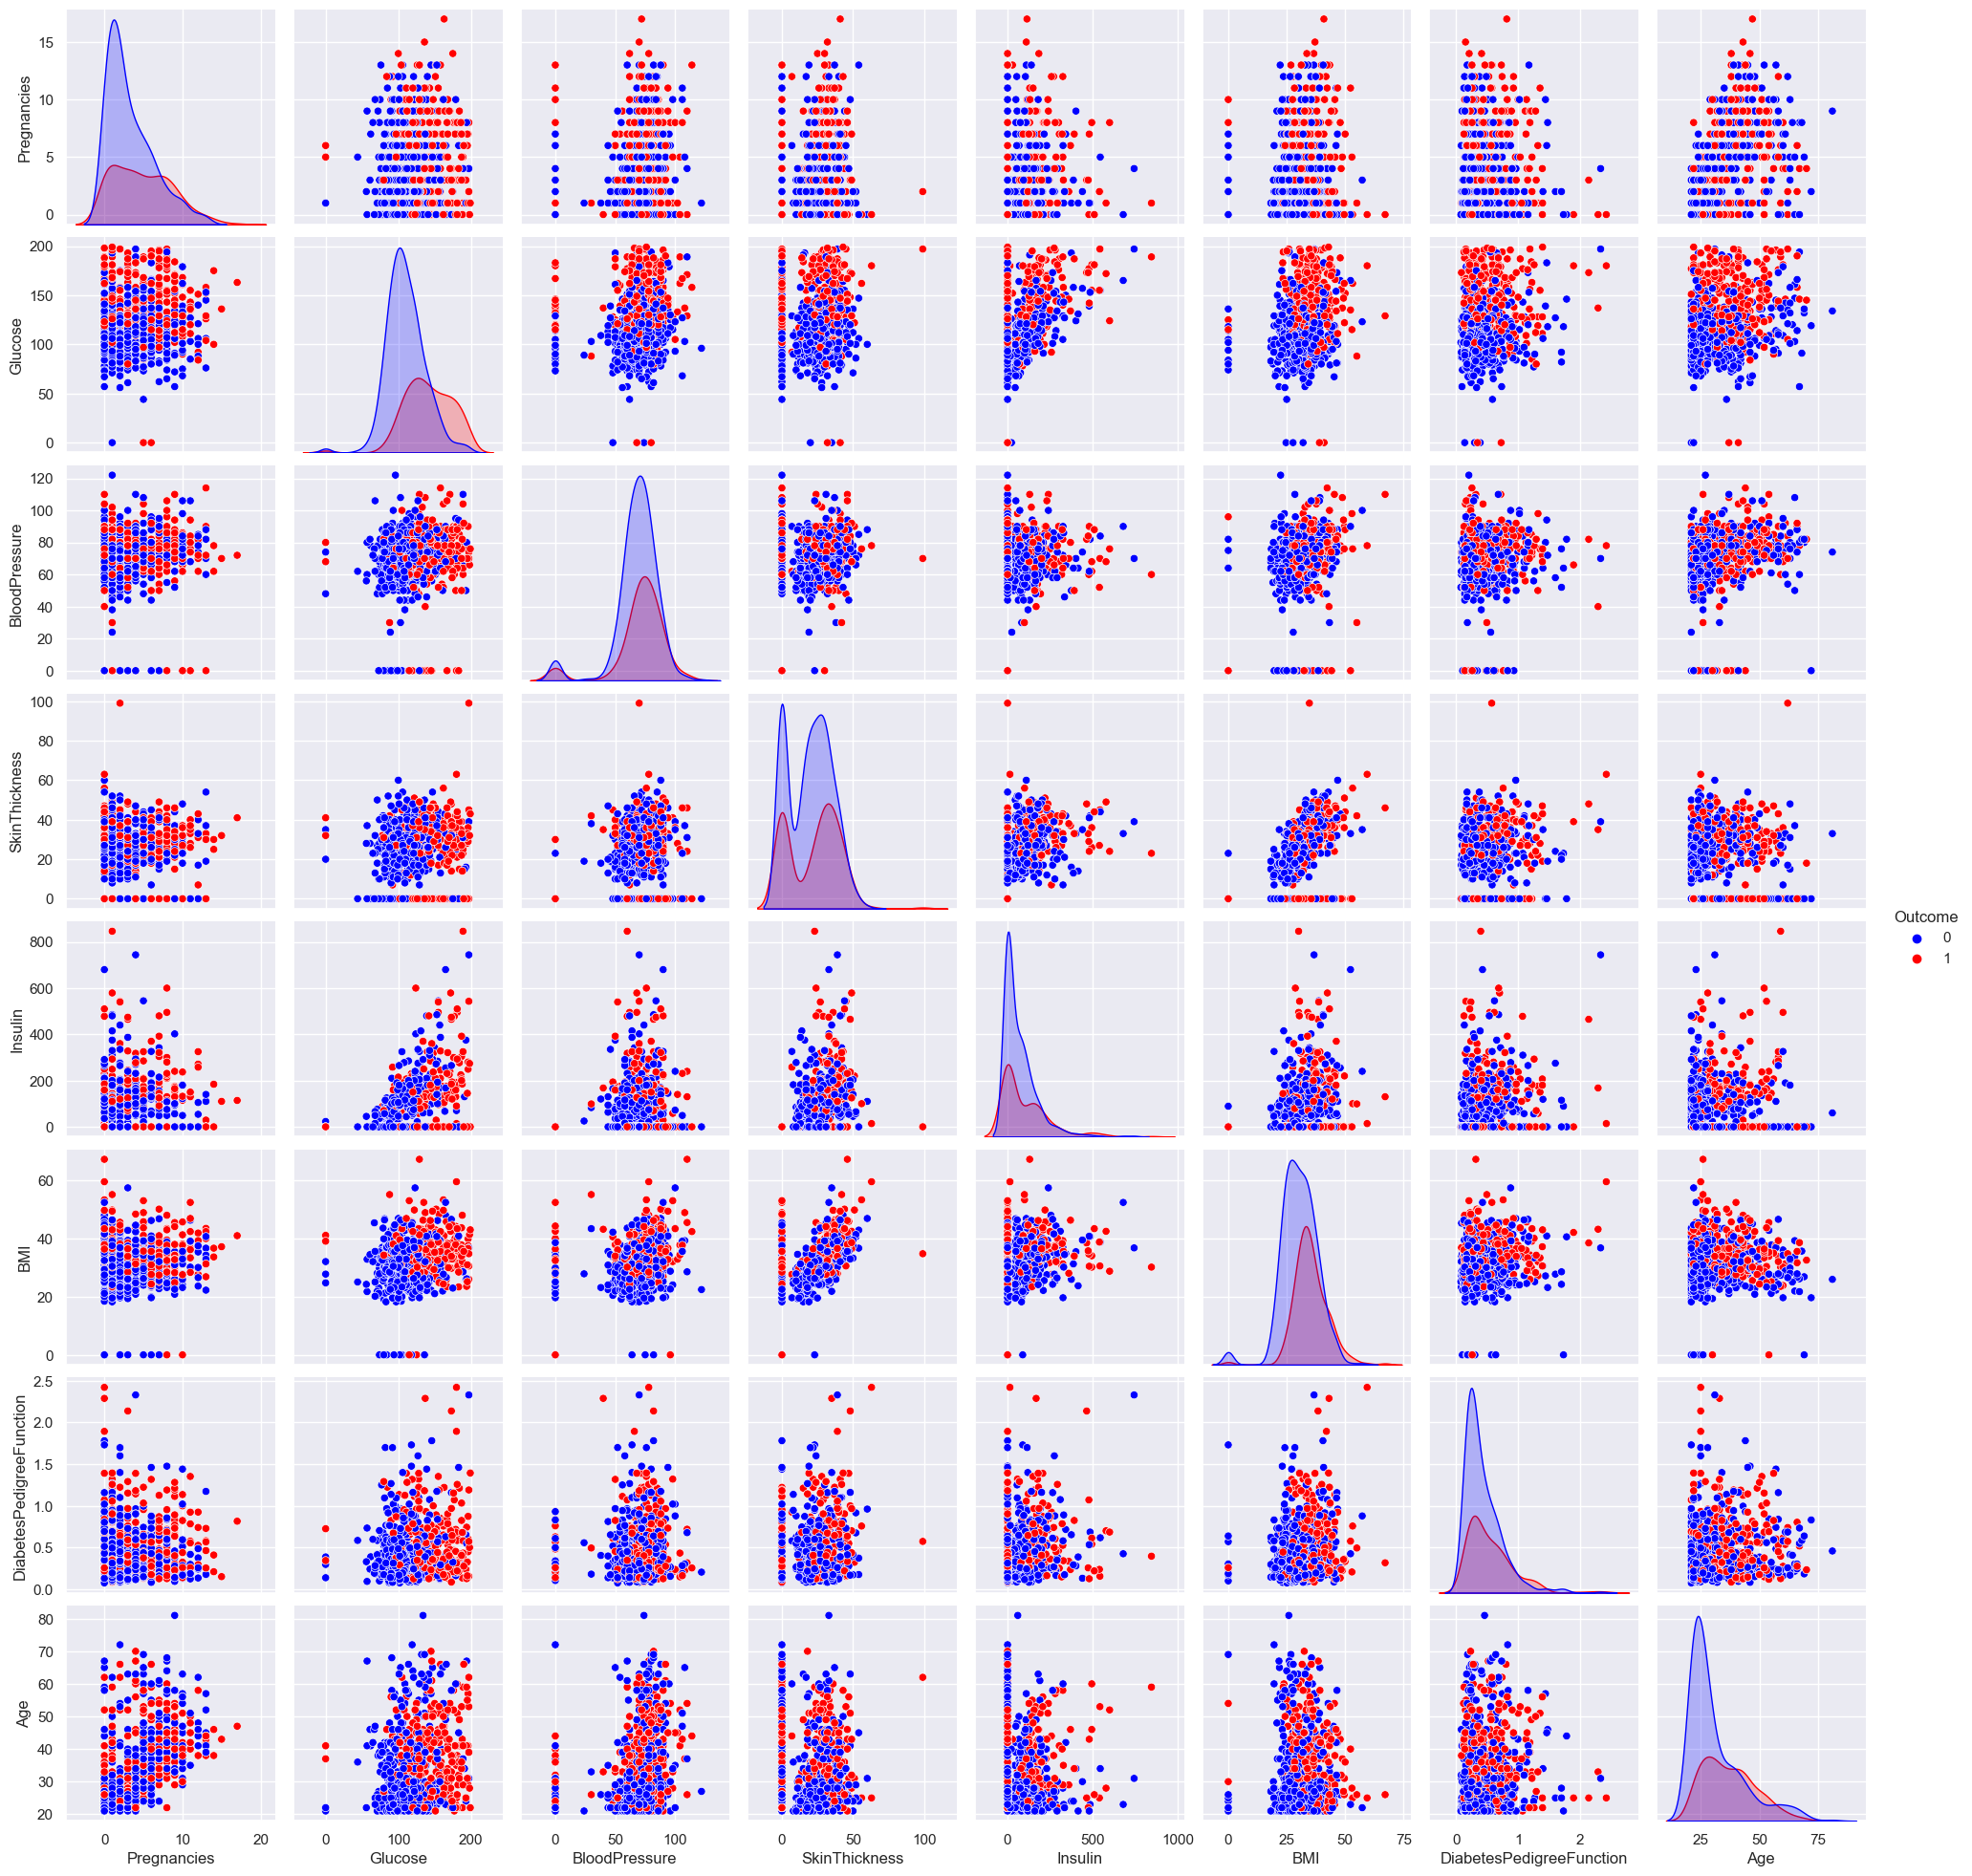

In [53]:
# Pair plot is considered to be one of the best tools for multivariate and bivariate analysis 
# It gives us a scatter plot representation for all columns against each other 
# So we can clearly see the correlations and distributions.

sns.set_style("darkgrid")
custom_palette = ["blue", "red"]
sns.set_palette(custom_palette)
sns.pairplot(df, hue='Outcome')

# <font color=black>**Preprocessing the data**</font>

In [54]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=0)

In [60]:
scaler = StandardScaler()

In [61]:
#Scaling the data
#It is important to use the same scaling parameters for both the training and test data 
#It ensures that the data are on the same scale. 
#That's why we use fit_transform for the training data and only transform for the test data, 
#As we don't want to calculate new parameters for the test data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <font color=black>**Models**</font>

### <font color=black>**1. Logistic Regression**</font>

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , plot_roc_curve , accuracy_score , plot_confusion_matrix, roc_auc_score

In [63]:
log_model = LogisticRegression()

In [64]:
#Training

log_model.fit(X_train,y_train)

LogisticRegression()

In [65]:
#Testing on test data

yhat_log=log_model.predict(X_test)

In [68]:
#Now let's evaluate our model with various metrics

print(classification_report(y_test , yhat_log))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [70]:
#Accuracy is pretty high

log_accuracy = accuracy_score(y_test , yhat_log)

0.7792207792207793

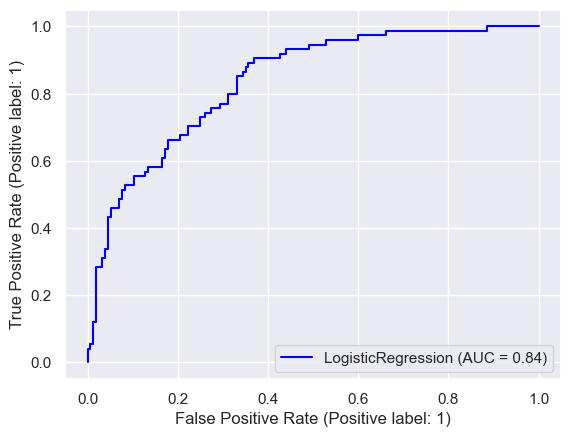

In [73]:
#AUC-area under the curve looks pretty good.

plot_roc_curve(log_model , X_test , y_test);

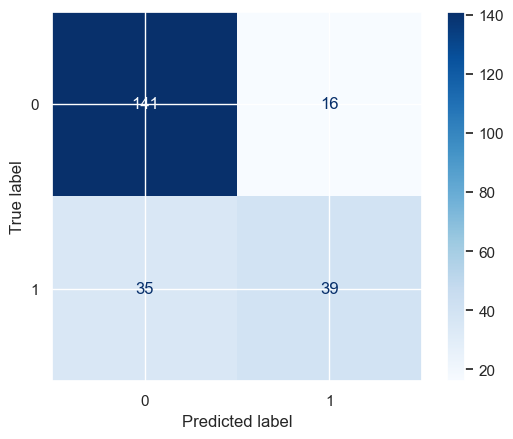

In [74]:
#Confusion matrix. TN=141 TP=39 FP=16 FN=35

plot_confusion_matrix(log_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### <font color=black>**2. K Nearest Neighbor**</font>

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [77]:
knn_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
yhat_knn = knn_model.predict(X_test)

In [80]:
print(classification_report(y_test , yhat_knn))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       157
           1       0.59      0.50      0.54        74

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.72      0.73      0.72       231



In [82]:
knn_accuracy = accuracy_score(y_test , yhat_knn)

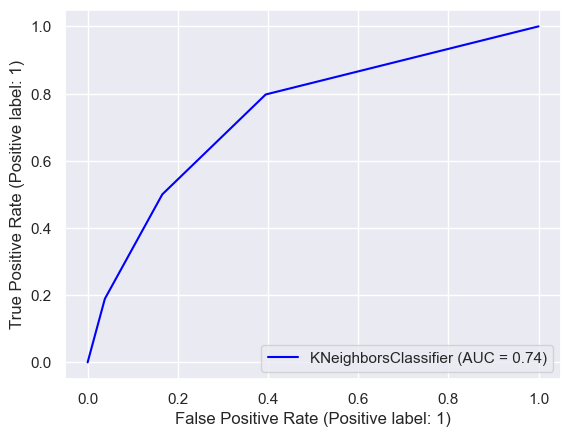

In [83]:
plot_roc_curve(knn_model , X_test , y_test);

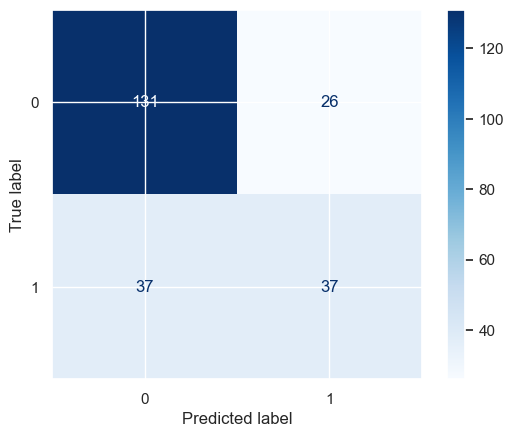

In [85]:
plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### <font color=black>**3. Decision Tree Classifier**</font>

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [88]:
yhat_dt = dt_model.predict(X_test)

In [89]:
print(classification_report(y_test , yhat_dt))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.58      0.61      0.60        74

    accuracy                           0.74       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [90]:
dt_accuracy = accuracy_score(y_test , yhat_dt)

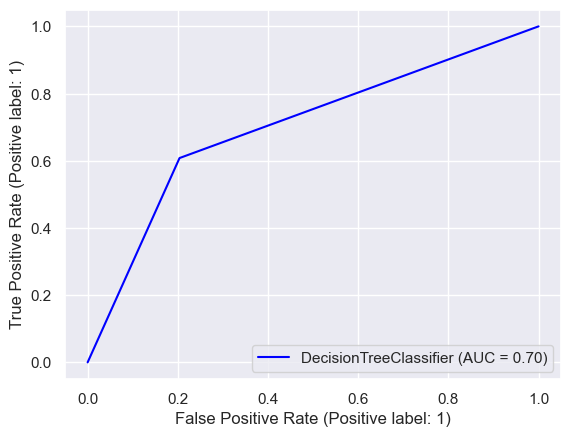

In [91]:
plot_roc_curve(dt_model , X_test , y_test);

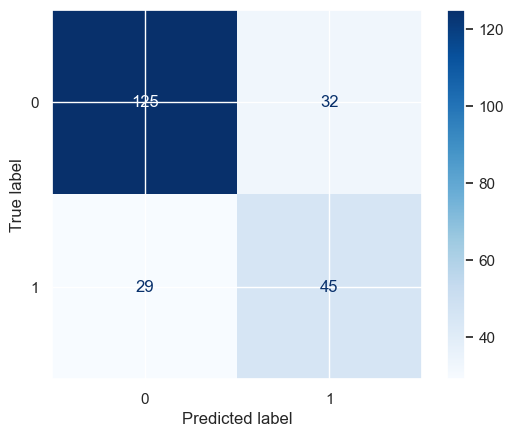

In [92]:
plot_confusion_matrix(dt_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### <font color=black>**4. Support Vector Machines**</font>

In [93]:
from sklearn.svm import SVC 

In [95]:
svm_model = SVC()
svm_model.fit(X_train , y_train)

SVC()

In [96]:
yhat_svm = svm_model.predict(X_test)

In [97]:
print(classification_report(y_test , yhat_svm))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.49      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



In [99]:
svm_accuracy = accuracy_score(y_test , yhat_svm)

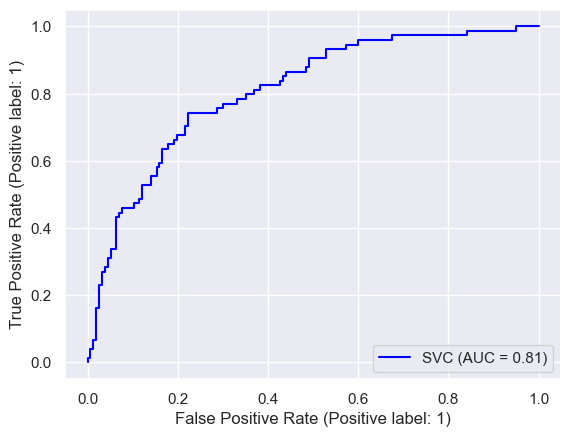

In [100]:
plot_roc_curve(svm_model , X_test , y_test);

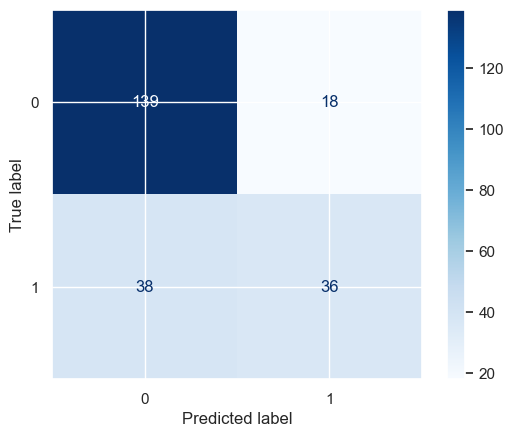

In [118]:
plot_confusion_matrix(svm_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [119]:
roc_auc_score(y_test,yhat_svm)

0.685918402478912

### <font color=black>**5. RandomForestClassifier**</font>

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [126]:
yhat_rf = rf_model.predict(X_test)

In [127]:
print(classification_report(y_test , yhat_rf))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.68      0.51      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



In [128]:
rf_accuracy = accuracy_score(y_test , yhat_rf)

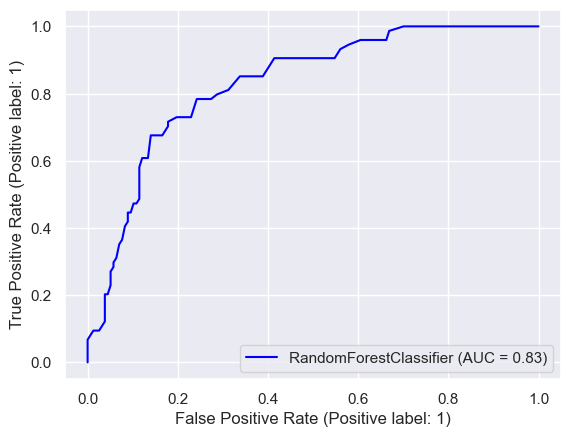

In [129]:
plot_roc_curve(rf_model , X_test , y_test);

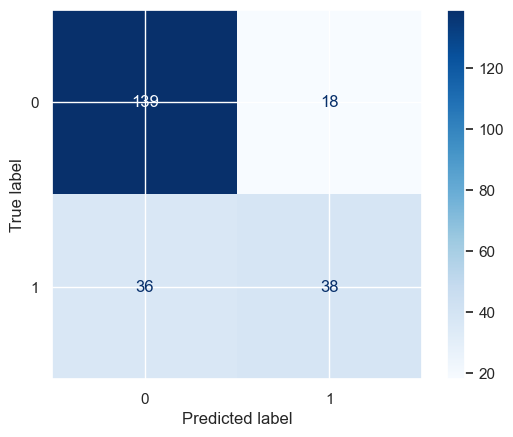

In [130]:
plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# <font color=black>**Summary**</font>

In [131]:
#We can conclude that the Logistic Regression is the best model for diabetes prediction in the given dataset

pd.DataFrame([log_accuracy , svm_accuracy , knn_accuracy , rf_accuracy , dt_accuracy   ] 
             , index = ['Logistig Regression' , 'SVM' , 'KNN' , 'Random Forest' , 'Decison Tree'   ] 
             , columns=['Accuracy'])

Accuracy
Logistig Regression  0.779221
SVM                  0.757576
KNN                  0.727273
Random Forest        0.766234
Decison Tree         0.735931